# Интерполационна формула на Лагранж. Теорема за оценка на грешката при интерполация.

## Задача 1

Да се намери приближено стойността на $\sin \dfrac{\pi}{5}$, като за целта се построи интерпоалционният полином на Лагранж за функцията $\sin(x)$ с възли $x_0=0$, $x_1=\frac{\pi}{6}$, $x_2=\frac{\pi}{3}$, $x_3=\frac{\pi}{2}$. Да се начертаят графиките на двете функции, заедно с точките на интерполация в една коориднатна система. Да се направи оценка на грешката от така направеното приближение и да се сравни с абсолютната грешка.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [ ]:
#construct the interpoalting polynomial
x0 = 0
x1 = math.pi/6
x2 = math.pi/3
x3 = math.pi/2

def f(x):
    return np.sin(x)

y0 = f(x0)
y1 = f(x1)
y2 = f(x2)
y3 = f(x3)

def l0(x):
    return (x - x1)*(x - x2)*(x - x3)/((x0 - x1)*(x0 - x2)*(x0 - x3))
def l1(x):
    return (x - x0)*(x - x2)*(x - x3)/((x1 - x0)*(x1 - x2)*(x1 - x3))
def l2(x):
    return (x - x0)*(x - x1)*(x - x3)/((x2 - x0)*(x2 - x1)*(x2 - x3))
def l3(x):
    return (x - x0)*(x - x1)*(x - x2)/((x3 - x0)*(x3 - x1)*(x3 - x2))

def L3(x):
    return y0 * l0(x) + y1 * l1(x) + y2 * l2(x) + y3 * l3(x)

In [3]:
#compute the approximation 
exact_value = math.sin(math.pi/5)
approx_value = L3(math.pi/5)
error_estimate = 1/24 * abs(math.pi/5 * (math.pi/5 - math.pi/6) * (math.pi/5 - math.pi/3) * (math.pi/5 - math.pi/2))
print("Exact value: ", exact_value)
print("Approx value: ", approx_value)
print("Absolute error: ", abs(exact_value - approx_value))
print("Error estimate: ", error_estimate)

Exact value:  0.5877852522924731
Approx value:  0.5870614872174387
Absolute error:  0.000723765075034466
Error estimate:  0.0010823232337111382


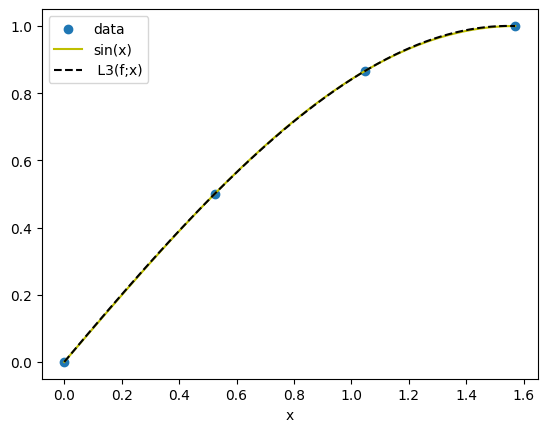

In [4]:
#plot data
nodes = np.array([0, math.pi/6, math.pi/3, math.pi/2])
f_values = np.sin(nodes)
plt.scatter(nodes, f_values)
# graph bot functions
x_axis = np.linspace(0, math.pi/2, 1000)
plt.plot(x_axis, np.sin(x_axis), color='y')
plt.plot(x_axis, L3(x_axis), color='black', linestyle='dashed')
plt.xlabel('x')
plt.legend(['data','sin(x)',' L3(f;x)'])
plt.show()

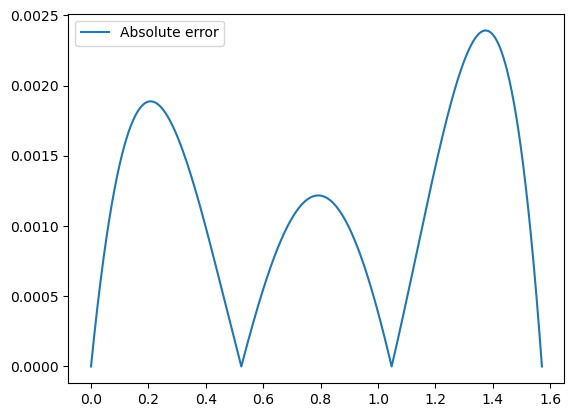

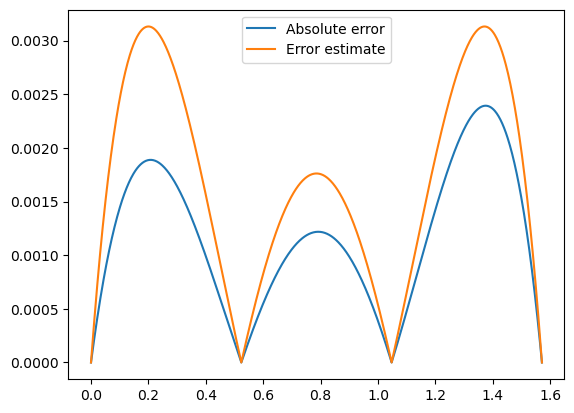

In [18]:
#plot errors as functions of  x
def abs_error_func(x):
    return abs(f(x) - L3(x))

def error_estimate(x):
    return 1/24 * abs(x * (x - math.pi/6) * (x - math.pi/3) * (x - math.pi/2))

plt.plot(x_axis, abs_error_func(x_axis))
plt.legend(['Absolute error'])
plt.show()
plt.plot(x_axis, abs_error_func(x_axis))
plt.plot(x_axis, error_estimate(x_axis))
plt.legend(["Absolute error","Error estimate"])
plt.show()

## Задача 2*

Да се напише функция *lagrange_poly(f, nodes, x)*, която пресмята стойността на интерполационния полином на Лагранж за функцията *f(x)* с възли *nodes* в точка *x*, при произволен избор на различни възли и функция *f(x)*. Параметърът *nodes* да се интерпретира като масив от реални числа, f - име на функция, a *x*- проивзолно реално число.

In [ ]:
import numpy as np
nodes = [0, np.pi/6, np.pi/3, np.pi/2]
x = np.pi/5
f = np.sin

def lagrange_poly(f, nodes, x):
    n = len(nodes)
    result = 0.0

    for i in range(n):
        xi = nodes[i]
        Li = 1.0
        for j in range(n):
            if i != j:
                Li *= (x - nodes[j]) / (xi - nodes[j])
        result += f(xi) * Li

    return result

print(lagrange_poly(f,nodes,x))


0.5870614872174388
